In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [114]:
Dataset_link = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(Dataset_link)

In [115]:
# checking the dataset (first and last 10 raws)
print(df.head(10))
print(df.tail(10))

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   
5   Amir Johnson  Boston Celtics      90       PF   29  06-Sep     240   
6  Jordan Mickey  Boston Celtics      55       PF   21  06-Aug     235   
7   Kelly Olynyk  Boston Celtics      41        C   25     7-0     238   
8   Terry Rozier  Boston Celtics      12       PG   22  06-Feb     190   
9   Marcus Smart  Boston Celtics      36       PG   22  06-Apr     220   

             College      Salary  
0              Texas   7730337.0  
1          Marquette   6796117.0  
2  Boston University         NaN  
3      Georgia State   1148640.0  
4         

# Preprocessing

In [116]:
# Replacing height column with random values between 150 and 180

df['Height'] = np.random.randint(150,181)

# checking for missing values

In [117]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

# Analysis Task 1

In [118]:
# Distribution of Employees in each team(in percentage)
Team_Counts = df['Team'].value_counts()
Total_Employees = len(df)
Team_Percentage = (Team_Counts/Total_Employees) * 100
print(Team_Percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

#Visualization(Employee Distribution across teams-Number of Employees vs Teams)

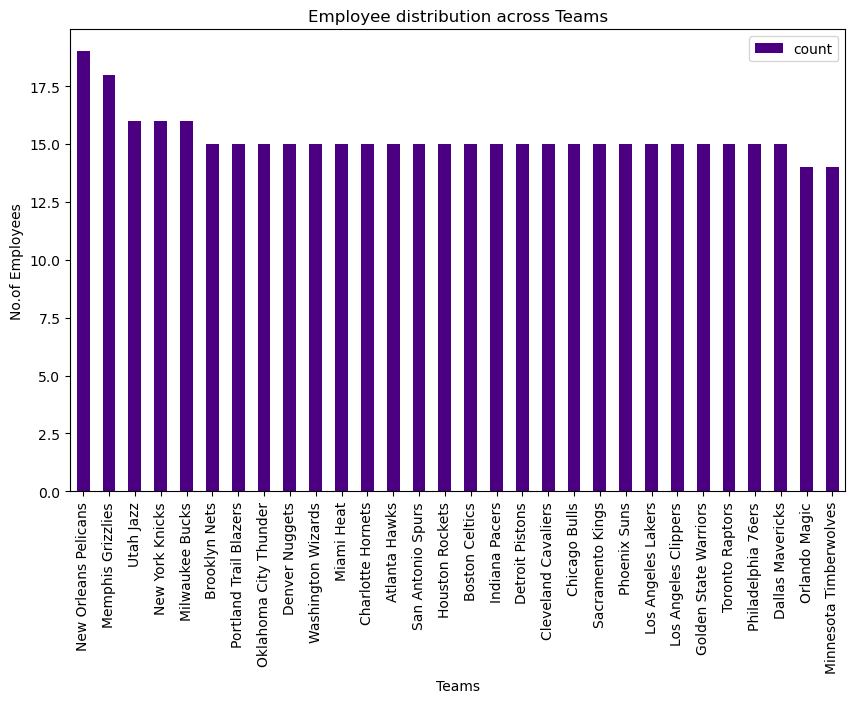

In [119]:
plt.figure(figsize = (10,6))
Team_Counts.plot(kind='bar', color= 'Indigo')
plt.xlabel("Teams")
plt.ylabel("No.of Employees")
plt.title("Employee distribution across Teams")
plt.legend()
plt.show()

# Analysis Task 2: Segregation Based on Position within the company

In [120]:
Position_Counts = df['Position'].value_counts()

#visualization

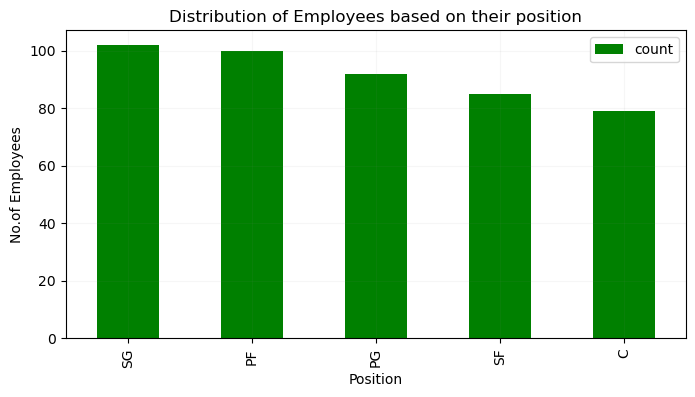

In [121]:
plt.figure(figsize = (8,4))
Position_Counts.plot(kind='bar', color = 'g')
plt.xlabel("Position")
plt.ylabel("No.of Employees")
plt.title("Distribution of Employees based on their position")
plt.grid(color= 'grey', alpha = 0.07)
plt.legend()
plt.show()

# Analysis Task 3

In [122]:
# Identifying the predomiunant age grup among Employees
def age_groups(age):
    if 20<= age <30:
        return '20-30'
    elif 30<= age <40:
        return '30-40'
    elif 40<= age<50:
        return '40-50'
    elif 50<= age <60:
        return '50-60'
    else:
        return 'Age 60 or above'
df['Age group'] = df['Age'].apply(age_groups)
Age_group_Classification = df['Age group'].value_counts()        

#Visualization

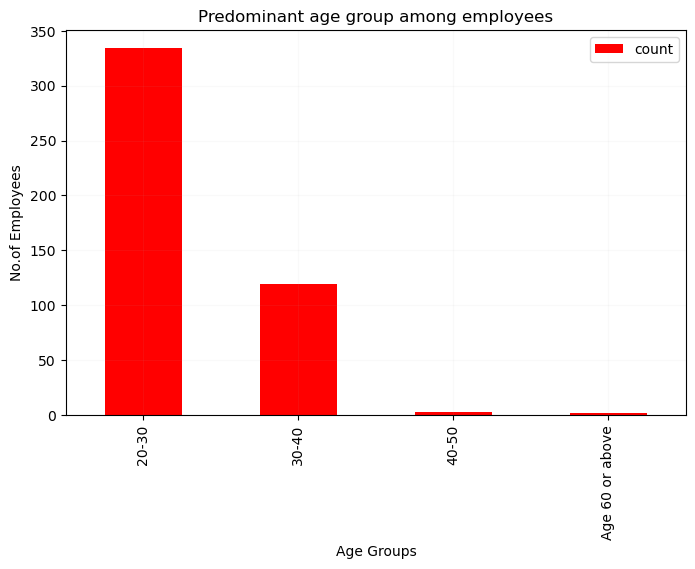

In [123]:
plt.figure(figsize = (8,5))
Age_group_Classification.plot(kind = 'bar',color='r')
plt.xlabel("Age Groups")
plt.ylabel("No.of Employees")
plt.title("Predominant age group among employees")
plt.grid(alpha=0.07)
plt.legend()
plt.show()

# Analysis Task 4

In [124]:
# Team with the highest salary expenditure
Team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

#Visualization(Team with the highest salary expenditure)

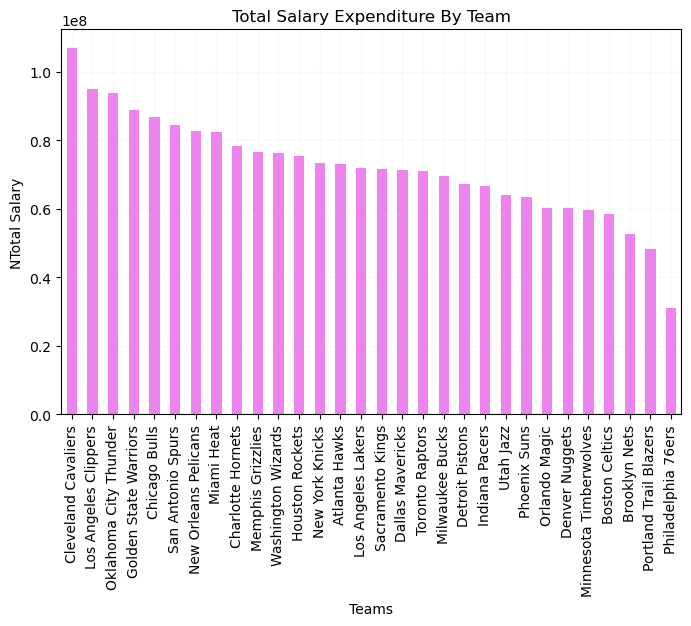

In [125]:
plt.figure(figsize = (8,5))
Team_salary.plot(kind = 'bar',color='Violet')
plt.xlabel("Teams")
plt.ylabel("NTotal Salary")
plt.title("Total Salary Expenditure By Team")
plt.grid(alpha=0.07)
plt.show()

In [126]:
# Position with the highest salary expenditure
Position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

#Visualization

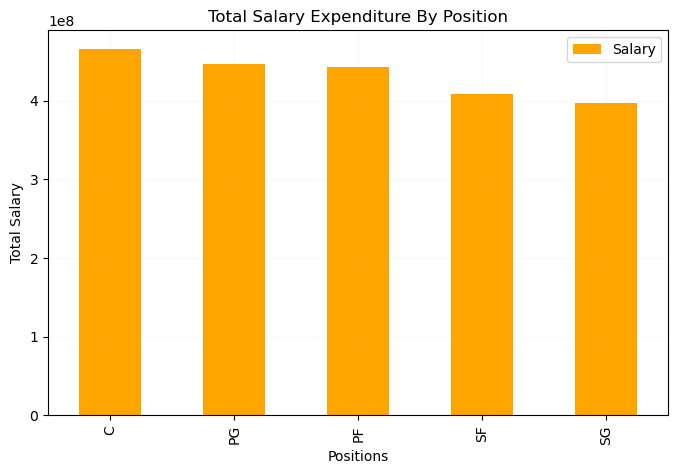

In [127]:
plt.figure(figsize = (8,5))
Position_salary.plot(kind = 'bar',color='Orange')
plt.xlabel("Positions")
plt.ylabel("Total Salary")
plt.title("Total Salary Expenditure By Position")
plt.grid(alpha=0.07)
plt.legend()
plt.show()

# Analysis Task 5(Correlation Between Age and Salary)

#Visualization

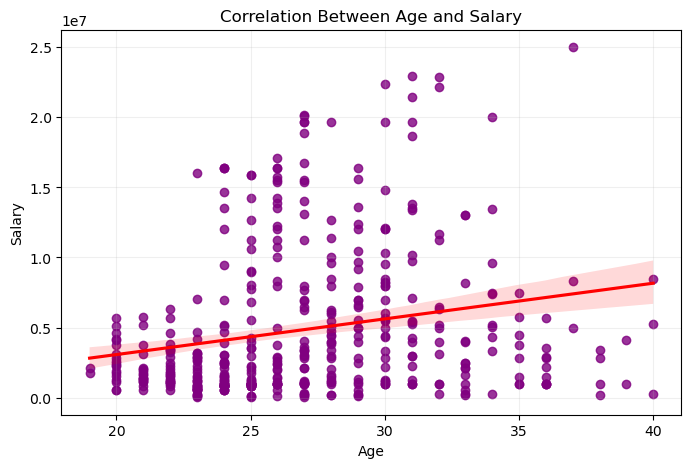

In [128]:
plt.figure(figsize = (8,5))
sns.regplot(x = df['Age'], y= df['Salary'], scatter_kws={'color':'purple'}, line_kws ={'color':'red'})
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.grid(alpha=0.2)
plt.show()

# insights

In [129]:
print("Insights are: ")
print("1. The most populated Team is:", Team_Counts.idxmax())
print("2. The most Common Position is:", Position_Counts.idxmax())
print("3. The Predominant Age group is:",  Age_group_Classification.idxmax())
print("4. The most team with highest Salary expenditure is:", Team_salary .idxmax())
print("5. The Position with highest Salary expenditure is:", Position_salary .idxmax())
print("6. Correlation between Age and Salary:", df[['Age', 'Salary']].corr().iloc[0,1])

Insights are: 
1. The most populated Team is: New Orleans Pelicans
2. The most Common Position is: SG
3. The Predominant Age group is: 20-30
4. The most team with highest Salary expenditure is: Cleveland Cavaliers
5. The Position with highest Salary expenditure is: C
6. Correlation between Age and Salary: 0.21400941226570955
